unit8 인구구조를 다양한 형태로 시각화하기

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

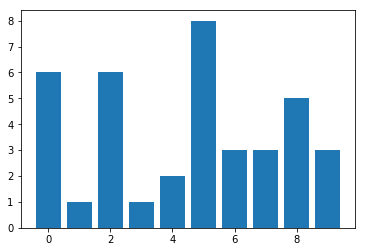

In [3]:
#막대그래프(X,Y)
plt.bar(np.arange(10), np.random.randint(1,10, size =10))

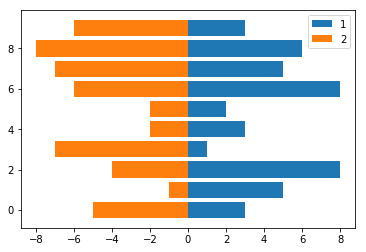

In [6]:
#수평막대그래프
plt.barh(np.arange(10), np.random.randint(1,10, size =10), label='1')
plt.barh(np.arange(10), -np.random.randint(1,10, size =10), label='2')
plt.legend()

연령별 인구현황

In [59]:
#p115
df = pd.read_csv('gender.csv', encoding='cp949')
df = df.replace(',', '',regex=True)
df.shape

(3842, 207)

- 특정 도시(서울)의 여성과 남성의 나이별 인구수 대조
- 컬럼 위치 찾기 :  남 0세 ~ 남 90세, 여 0세 ~ 여 90세
- 0세:1명 1세:20명... 도시에서 모두 누적 > 막대 그래프로 표현

In [61]:
max_age = 99
city = '서울특별시 서초구 양재2동' 
#city = '전라남도 고흥군 포두면' 
man_0 = '2019년05월_남_0세'
woman_0 = '2019년05월_여_0세'
type(list(df.columns))
columns = list(df.columns)
man_0_index = columns.index(man_0)
woman_0_index = columns.index(woman_0)
columns1[man_0_index], columns1[man_0_index + max_age]
columns1[woman_0_index], columns1[woman_0_index + max_age]


('2019년05월_여_0세', '2019년05월_여_99세')

In [62]:
data = np.array(df)
area = data[:, 0]
city_row_index = -1
for i in range(len(area)):
    if city in area[i]:
        print(i, area[i])
        city_row_index = i

378 서울특별시 서초구 양재2동(1165065200)


In [63]:
city_data = data[city_row_index] # 특정도시 데이터
city_man = city_data[man_0_index:man_0_index+max_age].astype(np.int)
city_woman = city_data[woman_0_index:woman_0_index+max_age].astype(np.int)
city_man.shape, city_woman.shape

((99,), (99,))

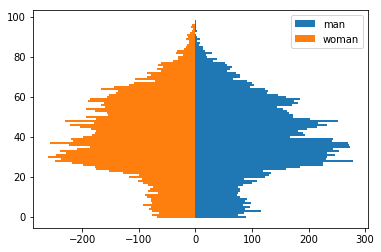

In [64]:
m = plt.barh(np.arange(len(city_man)), city_man, label = 'man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label = 'woman')
m= plt.legend()

In [65]:
city = '서울' # 이 글자가 들어간 행은 전부 찾자, 조건부 검색, 마스크(True만 뽑기)
is_contain = []
for i in range(len(area)):
        is_contain.append(city in area[i])
np.mean(is_contain)
city_data = data[is_contain]
city_data.shape

(450, 207)

In [72]:
city_man = city_data[:, man_0_index:man_0_index+max_age].astype(np.int)
city_woman = city_data[:, woman_0_index:woman_0_index+max_age].astype(np.int)
city_man.shape, city_woman.shape
city_man = np.sum(city_man, axis=0)
city_woman = np.sum(city_woman, axis=0)

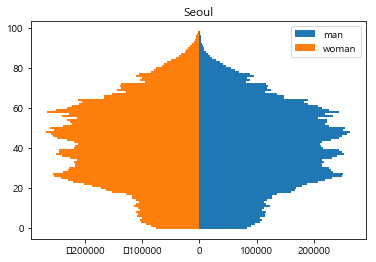

In [82]:
plt.title('Seoul')
m = plt.barh(np.arange(len(city_man)), city_man, label = 'man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label = 'woman')
m= plt.legend()

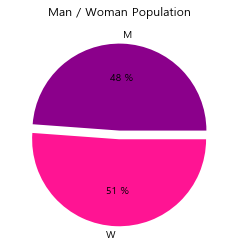

In [88]:
plt.title('Man / Woman Population')
colors = ['skyblue', 'pink']
n = plt.pie([np.sum(city_man), np.sum(city_woman)], labels= ['M', 'W'], colors=color, autopct='%d %%', explode=(0,0.1))

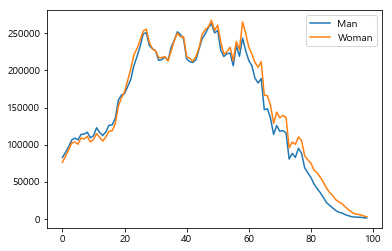

In [91]:
p = plt.plot(city_man, label='Man')
p = plt.plot(city_woman, label='Woman')
plt.legend()

<BarContainer object of 99 artists>

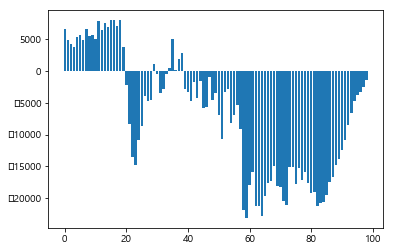

In [93]:
#144 남녀 인구의 차이
plt.bar(np.arange(len(city_man)), city_man - city_woman)

### 파이그래프

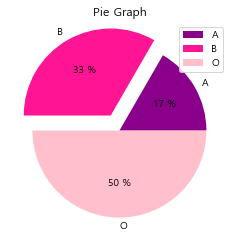

In [81]:
#p130, p134 파이 돌출 효과
plt.rc('font', family='Malgun Gothic')
color = ['darkmagenta', 'deeppink', 'pink']
plt.title('Pie Graph')
n = plt.pie([10,20,30], labels=['A', 'B', 'O'], autopct='%.0f %%'
           , colors=color, explode=(0, 0.2, 0))
n = plt.legend()

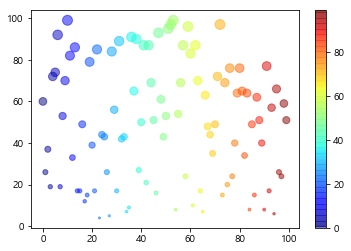

In [104]:
#p144 산점도(scatter) 산개할 산, 점 점, 그림 도
#p146 s(size), c(color)
color = ['red', 'green', 'black', 'gold']
y = np.random.randint(0,100, size =100)
n = plt.scatter(np.arange(len(y)), y, s=y, c=range(len(y)), cmap='jet', alpha=0.5)
n = plt.colorbar()

<um> unordered list tag <ol> ordered list
- plot(x) plot(x, y) 선
- hist(x) 히스토그램
- boxplot(x) :분포
- bar(x, y) barh(x, y) 막대그래프
- pie(x)
- scatter(x, y) 산점도